# Classification
- Logistic regression
- Linear Discriminant Analysis (LDA)
- Quadratic Discriminant Analysis (QDA)
- K-Nearest Neighbors (KNN)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pathlib
import os
import sys
import seaborn as sns
import statistics
from sklearn.model_selection import train_test_split
import math
from tqdm.notebook import tqdm
import prettytable
from ipywidgets import interact
import ipywidgets as widgets
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from sklearn.linear_model import LogisticRegression
import random

In [3]:
import my_statistics as ms

In [4]:
default =pd.read_csv('Gradivo\\Default.csv')

In [5]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


[Text(1, 0, 'No'), Text(2, 0, 'Yes')]

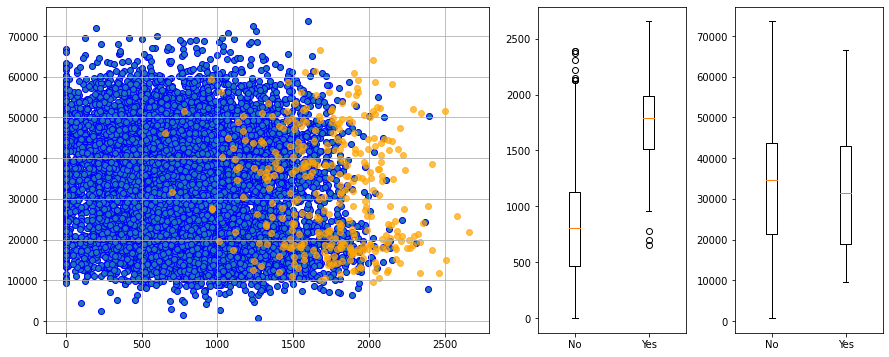

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15,6), gridspec_kw={'width_ratios': [3, 1, 1]})
skip = 1
def_y = default.default == 'Yes'
def_n = default.default == 'No'
ax[0].scatter(default.balance[def_n][::skip], default.income[def_n][::skip], edgecolor='b', color=None)
ax[0].scatter(default.balance[def_y], default.income[def_y], c='orange', alpha=.7)
ax[0].grid()
ax[1].boxplot([default.balance[def_n], default.balance[def_y]])
ax[1].set_xticks(ticks=[1,2])
ax[1].set_xticklabels(['No', 'Yes'])
ax[2].boxplot([default.income[def_n], default.income[def_y]])
ax[2].set_xticks(ticks=[1,2])
ax[2].set_xticklabels(['No', 'Yes'])

#### Logistic regression

In [7]:
# probabilities - zbirna porazdelitvena funkcija verjetnosti diskretne naključne spremenljivke
p_balance = []
balance_list = []
b_ind = np.argsort(default.balance)
def_balance = default.balance[b_ind]
def_def = default.default[b_ind]
for b in tqdm(def_balance):
    n_yes = def_def[(def_balance < b) & (def_def == 'Yes')].shape[0]
    n_no = def_def[(def_balance < b) & (def_def == 'No')][::skip].shape[0]
    n_all = n_yes + n_no
    try:
        p_yes = (n_yes / n_all)# /(n_all/default.balance.shape[0])
        p_balance.append(p_yes)
        balance_list.append(b)
    except ZeroDivisionError:
        pass
p_balance = np.array(p_balance)
balance_list = np.array(balance_list)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [8]:
# verjetnost P(default=Yes)
P_def_yes = default.default[default.default=='Yes'].shape[0]/default.default[default.default=='No'].shape[0]
print(f'P(default=Yes)={P_def_yes:.5}')

P(default=Yes)=0.034447


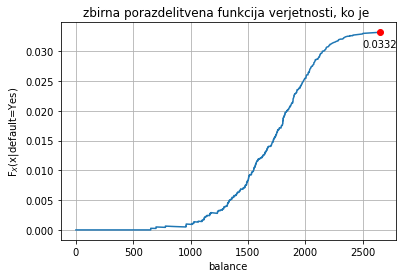

In [9]:
plt.title('zbirna porazdelitvena funkcija verjetnosti, ko je ')
plt.plot(balance_list, p_balance)
ind_max = np.argmax(p_balance)
plt.annotate(f'{p_balance[ind_max]:.4f}',(2500, p_balance[ind_max]-0.0025))
plt.plot(balance_list[ind_max], p_balance[ind_max],'o',c='r')
plt.xlabel('balance')
plt.ylabel(r'F$_X$(x|default=Yes)')
plt.plot()
plt.grid()

In [10]:
def least_squares_lin_reg(X, Y):
    β_1 = sum((X-ms.mean(X))*(Y-ms.mean(Y)))/sum((X-ms.mean(X))**2)
    β_0 = ms.mean(Y) - β_1*ms.mean(X)
    return β_0, β_1

In [11]:
def linear_regression(x, β_0, β_1):
    return β_0 + β_1*x

In [12]:
def logistic_regression(x, β_0, β_1):
    return np.e**(β_0 + β_1*x)/(1+np.e**(β_0 + β_1*x))

In [13]:
# linear regression
β_0_lin, β_1_lin = least_squares_lin_reg(balance_list, p_balance)
p_lin = linear_regression(default.balance, β_0_lin, β_1_lin) # parametra bi morala biti -10.6513 in 0.0055
print(β_0_lin, β_1_lin)

-0.00515922485698652 8.8773486179304e-06


In [14]:
# logistic regression
log_odds = np.log(p_balance/(1-p_balance))
balance_list_1 = balance_list[abs(log_odds)<1e10]
log_odds = log_odds[abs(log_odds)<1e10]
β_0_log, β_1_log = least_squares_lin_reg(balance_list_1, log_odds)
p_log = logistic_regression(np.sort(default.balance), β_0_log, 0.0055)
print(β_0_log, β_1_log)

-10.520080590709014 0.0036966619115103086


C:\Users\timvr\AppData\Local\Temp/ipykernel_14664/2478061350.py:2: RuntimeWarning: divide by zero encountered in log
  log_odds = np.log(p_balance/(1-p_balance))


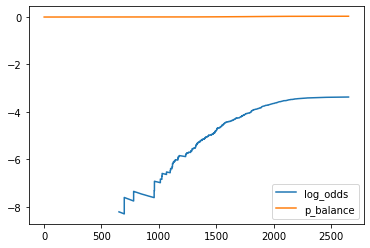

In [15]:
plt.plot(balance_list_1, log_odds, label='log_odds')
plt.plot(balance_list, p_balance, label='p_balance')
plt.legend()

In [16]:
default_dummies = default.default.copy()
default_dummies[default.default == 'No'] = 0
default_dummies[default.default == 'Yes'] = 1

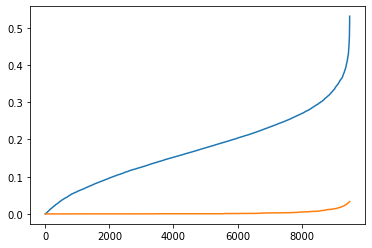

In [17]:
plt.plot(balance_list/5000)
plt.plot(p_balance)

In [18]:
default_dummy = np.zeros_like(np.array(default.default))
for j, i in enumerate(default.default):
    if i =='Yes':
        default_dummy[j] = 1
    else:
        default_dummy[j] = 0

In [19]:
log_reg_model = LogisticRegression()
log_reg_model.fit(np.array(default.balance).reshape(-1,1), list(default_dummy))
predictions = log_reg_model.predict(np.array(default.balance).reshape(-1,1))

In [20]:
prob_prediction = log_reg_model.predict_proba(np.array(default.balance).reshape(-1,1))

In [21]:
log_reg_model.coef_, log_reg_model.intercept_

(array([[0.00549892]]), array([-10.65132824]))

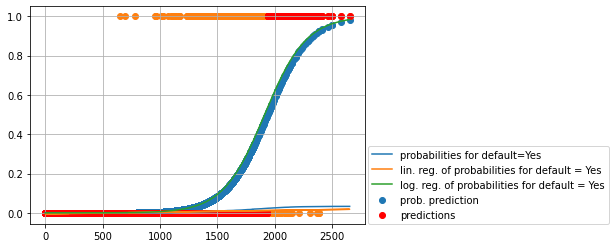

In [22]:
plt.plot(balance_list, p_balance, label='probabilities for default=Yes')
plt.plot(default.balance, p_lin, label='lin. reg. of probabilities for default = Yes')
plt.plot(np.sort(default.balance), p_log, label='log. reg. of probabilities for default = Yes')
plt.scatter(default.balance, prob_prediction[:,1], label ='prob. prediction')
plt.scatter(default.balance, default_dummies)
plt.scatter(default.balance, predictions, c='r', label='predictions')
plt.legend(loc = (1.01,0))
plt.grid()

#### Multiple logistic regression

In [23]:
student_dummy = np.zeros_like(np.array(default.student))
for j, i in enumerate(default.student):
    if i =='Yes':
        student_dummy[j] = 1
    else:
        student_dummy[j] = 0

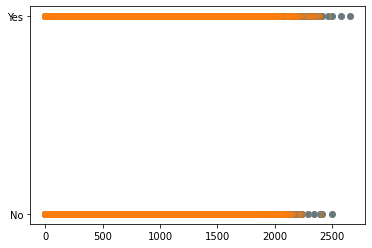

In [24]:
plt.scatter(default.balance, default.student)
plt.scatter(default.balance, student_dummy, alpha=0.3)

In [25]:
input_data = np.concatenate((np.array(default.balance).reshape(-1,1),
                             np.array(default.income).reshape(-1,1),
                             student_dummy.reshape(-1,1)),axis=1)

In [26]:
input_data.shape

(10000, 3)

In [27]:
multi_log_reg_model = LogisticRegression()
multi_log_reg_model.fit(input_data, list(default_dummy))
predictions_multi_log_reg = multi_log_reg_model.predict(input_data)
multi_log_prob_prediction = multi_log_reg_model.predict_proba(input_data)

In [29]:
ms.confusion_matrix(predictions_multi_log_reg, default_dummy, print_=True);

+-------------+-----------------------+-----------------------+
| True status |           No          |          Yes          |
+-------------+-----------------------+-----------------------+
|  Prediciton |                       |                       |
|      No     |        TN = 9609      |        FN = 271       |
|     Yes     |         FP = 58       |         TP = 62       |
|             | specificity = 99.40 % | sensitivity = 18.62 % |
+-------------+-----------------------+-----------------------+


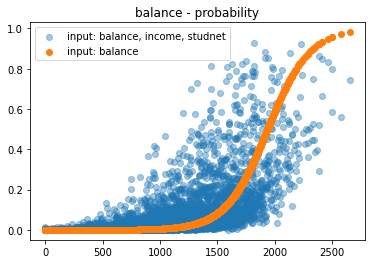

In [30]:
plt.title('balance - probability')
plt.scatter(input_data[:,0], multi_log_prob_prediction[:,1], label='input: balance, income, studnet', alpha=.4)
plt.scatter(default.balance, prob_prediction[:,1], label ='input: balance')
plt.legend()

In [31]:
multi_log_reg_model.coef_, multi_log_reg_model.intercept_

(array([[ 4.08201022e-03, -1.33893466e-04, -3.89009045e+00]]),
 array([-2.9508496]))

### Linear Discriminant Analysis (LDA)

In [32]:
def gauss(x, std, m):
    return 1/(np.sqrt(2*np.pi)*std)*np.e**(-1/(2*std**2)*(x-m)**2)

In [33]:
x = np.arange(-10,10,0.5)
m1, m2 = -1.25, 1.25
std1, std2 = 1, 1
gauss_1 = gauss(x, std = 1, m = -1.25, )
gauss_2 = gauss(x, std = 1, m = 1.25,)

In [34]:
# Bayes decision boundary
x_db = (m1 + m2)/2

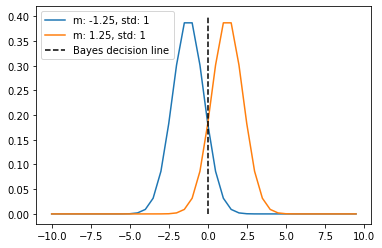

In [35]:
plt.plot(x, gauss_1, label=f'm: {m1}, std: {std1}')
plt.plot(x, gauss_2, label=f'm: {m2}, std: {std2}')
plt.plot((x_db, x_db),(0,.4), ls='--', c='k', label='Bayes decision line')
plt.legend()

##### Multiple predictors

In [36]:
data_points = np.zeros((len(gauss_1),len(gauss_2)))
for i,j in enumerate(gauss_1):
    data_points[i,:] = j*gauss_2

In [37]:
x_surface_1=np.zeros((len(x),len(x)))
x_surface_2=np.zeros((len(x),len(x)))
for i in range(len(x)):
    x_surface_1[i,:] = x
    x_surface_2[:,i] = x

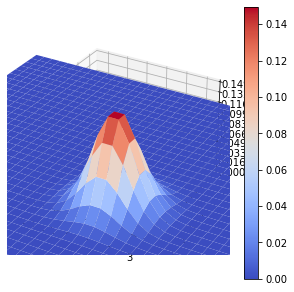

In [38]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
gauss_2d = ax.plot_surface(x_surface_1, x_surface_2, data_points, cmap=cm.coolwarm)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.set_xlim(-2.5, 3.5)
ax.set_ylim(-2.5,3.5)
fig.colorbar(gauss_2d)

In [39]:
# overall predictor covariance
predictors = np.concatenate((np.array(default.balance).reshape(-1,1),
                           np.array(default.income).reshape(-1,1),
                           student_dummy.reshape(-1,1)), axis=1)

In [40]:
# funkciji za izvedbo predikcij po LDA metodi
def lin_discriminant_function(x, μ, Σ, π):
    return x.T@np.linalg.inv(Σ)@μ-0.5*μ.T@np.linalg.inv(Σ)@μ + np.log(π)

def linear_discriminant_analysis(input_data, predictors, outputs, print_confusion_table=False):
    categories = np.unique(outputs)
    mu = np.zeros((len(categories), predictors.shape[1]))
    pi = np.zeros(len(categories))
    for j, i in enumerate(categories):
        avg = np.average(predictors[outputs==i], axis=0)
        mu[j, :] = avg
        pi[j] = predictors[outputs==i].shape[0]/predictors.shape[0]
    p_matrix = np.cov(predictors.astype(float).T)
    # discriminant function
    predictions_ = []
    for j,i in enumerate(input_data):
        delta_ = []
        for k in range(len(categories)):
            delta_.append(lin_discriminant_function(i, mu[k,:], p_matrix, pi[k]))
        category_ind = np.argmax(delta_)
        predictions_.append(categories[category_ind])
    
    return np.array(predictions_)

In [41]:
pred_func_LDE = linear_discriminant_analysis(predictors, predictors, default_dummy)

In [42]:
ms.confusion_matrix(pred_func_LDE, default_dummy, print_=True);

+-------------+-----------------------+-----------------------+
| True status |           No          |          Yes          |
+-------------+-----------------------+-----------------------+
|  Prediciton |                       |                       |
|      No     |        TN = 9658      |        FN = 282       |
|     Yes     |         FP = 9        |         TP = 51       |
|             | specificity = 99.91 % | sensitivity = 15.32 % |
+-------------+-----------------------+-----------------------+


##### Bayes decision boundary modification

In [43]:
# funkciji za izvedbo predikcij po LDA metodi
def lin_discriminant_function(x, μ, Σ, π):
    return x.T@np.linalg.inv(Σ)@μ-0.5*μ.T@np.linalg.inv(Σ)@μ + np.log(π)

def LDA_decision_boundary_mod(input_data, predictors, outputs,
                              decision_boundary=(1, .5)):
    """
    LDE for 2 class prediction.
    :param decision_boundary: Bayes decision boundary modification - tuple
                                (class for which we are setting decision 
                                boundary [0 or 1], decision boundary
                                [0 to 1])
    """
    categories = np.unique(outputs)
    mu = np.zeros((len(categories), predictors.shape[1]))
    pi = np.zeros(len(categories))
    for j, i in enumerate(categories):
        avg = np.average(predictors[outputs==i], axis=0)
        mu[j, :] = avg
        pi[j] = predictors[outputs==i].shape[0]/predictors.shape[0]
    p_matrix = np.cov(predictors.astype(float).T)
    # discriminant function
    predictions_ = []
    for j,i in enumerate(input_data):
        delta_ = []
        for k in range(len(categories)):
            delta_.append(lin_discriminant_function(i, mu[k,:],
                                                    p_matrix, pi[k]))
        delta_ratio = delta_[decision_boundary[0]]/(delta_[decision_boundary[0]] + delta_[not decision_boundary[0]])
        if delta_ratio > decision_boundary[1]:
            predictions_.append(categories[decision_boundary[0]])
        else:
            predictions_.append(categories[int(not decision_boundary[0])])
    return np.array(predictions_)

In [44]:
pred_func_LDE = LDA_decision_boundary_mod(predictors, predictors, 
                                          default_dummy,
                                          decision_boundary=(1,.437))

In [45]:
matrix, sens, spec, overall = ms.confusion_matrix(pred_func_LDE, default_dummy, print_ = True)

+-------------+-----------------------+-----------------------+
| True status |           No          |          Yes          |
+-------------+-----------------------+-----------------------+
|  Prediciton |                       |                       |
|      No     |        TN = 7788      |         FN = 55       |
|     Yes     |        FP = 1879      |        TP = 278       |
|             | specificity = 80.56 % | sensitivity = 83.48 % |
+-------------+-----------------------+-----------------------+


In [46]:
sens_ = []
spec_ = []
overall_ = []
for i in tqdm(np.linspace(0,0.61,60)):
    pred_func_LDE = LDA_decision_boundary_mod(predictors, predictors,
                                              default_dummy,
                                              decision_boundary=(1,i))
    _, sens, spec, overall = ms.confusion_matrix(pred_func_LDE, default_dummy,
                                                 print_ = False)
    sens_.append(sens)
    spec_.append(spec)
    overall_.append(overall)

  0%|          | 0/60 [00:00<?, ?it/s]

In [47]:
%matplotlib inline
def graph(loc=25):
    x = np.linspace(0,0.61,60)
    plt.plot(x, sens_, c='r', label='sensitivity')
    plt.plot(x, spec_, c='b', label='specificity')
    plt.plot(x,overall_, c ='k', ls='--', label='overall accuracy')
    plt.xlabel('Decision boundary for default=Yes')
    plt.plot([x[loc], x[loc]], [0,1], c='k')
    plt.legend()
    plt.grid()
    print(f'Decision bounary: {x[loc]:.4f}\nSensitivity = {sens_[loc]:.4f}\nSpecificity = {spec_[loc]:.4f}')
    return plt.show()
interact(graph, loc=widgets.IntSlider(min=0, max=60, step=1))

interactive(children=(IntSlider(value=0, description='loc', max=60), Output()), _dom_classes=('widget-interact…

<function __main__.graph(loc=25)>

##### ROC curve
- true positive rate = sensitivity
- false positive rate = 1 - specificity

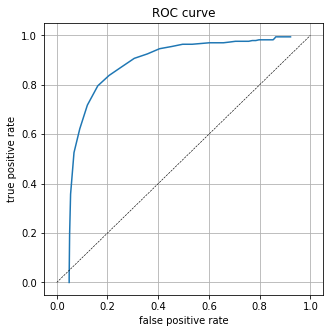

In [48]:
plt.figure(figsize=(5,5))
plt.plot(1-np.array(spec_), np.array(sens_))
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.grid()
plt.plot([0,1],[0,1], c='k',ls='--', lw=.6)

### Quadratic Discriminant analysis (QDA)

In [49]:
# funkciji za izvedbo predikcij po LDA metodi
def quad_discriminant_function(x, μ, Σ, π):
    return -0.5*x.T@np.linalg.inv(Σ)@x+\
            x.T@np.linalg.inv(Σ)@μ-0.5*μ.T@np.linalg.inv(Σ)@μ -\
            0.5*np.log(np.linalg.det(Σ)) + np.log(π)

def quadratic_discriminant_analysis(input_data, predictors, outputs,
                                 decision_boundary=(1,.5)):
    """
    LDE for 2 class prediction.
    :param decision_boundary: Bayes decision boundary modification - tuple
                                (class for which we are setting decision 
                                boundary [0 or 1], decision boundary
                                [0 to 1])
    """
    categories = np.unique(outputs)
    mu = np.zeros((len(categories), predictors.shape[1]))
    pi = np.zeros(len(categories))
    p_matrix = np.zeros((len(categories), predictors.shape[1], predictors.shape[1]))
    for j, i in enumerate(categories):
        avg = np.average(predictors[outputs==i], axis=0)
        mu[j, :] = avg
        pi[j] = predictors[outputs==i].shape[0]/predictors.shape[0]
        p_matrix[j, :, :] = np.cov(predictors[outputs==i].astype(float).T)
    # discriminant function
    predictions_ = []
    for j,i in enumerate(tqdm(input_data)):
        delta_ = []
        for k in range(len(categories)):
            delta_.append(quad_discriminant_function(i, mu[k,:],
                                                    p_matrix[k,:,:], pi[k]))
        category_ind = np.argmax(delta_)
        predictions_.append(categories[category_ind])
    
    return np.array(predictions_)

In [50]:
pred_func_QDE = quadratic_discriminant_analysis(predictors[1::2], predictors[::2], default_dummy[::2])

  0%|          | 0/5000 [00:00<?, ?it/s]

In [51]:
ms.confusion_matrix(pred_func_QDE, default_dummy[1::2], print_=True);

+-------------+-----------------------+-----------------------+
| True status |           No          |          Yes          |
+-------------+-----------------------+-----------------------+
|  Prediciton |                       |                       |
|      No     |        TN = 4805      |        FN = 130       |
|     Yes     |         FP = 16       |         TP = 49       |
|             | specificity = 99.67 % | sensitivity = 27.37 % |
+-------------+-----------------------+-----------------------+


### K-nearest neighbors (KNN)

In [52]:
test_point_ = predictors[0]
input_data_=predictors
norm_basis = abs(input_data_).max(axis=0) # values for normalization
input_data = input_data_.copy()
test_point = test_point_.copy()
to_norm = norm_basis != 0 # predictors to be normalized
print(to_norm, norm_basis)
input_data[:,to_norm] = input_data_[:,to_norm] / norm_basis[to_norm]
test_point[to_norm] = test_point_[to_norm] / norm_basis[to_norm]

[ True  True  True] [2654.32257628018 73554.2334951972 1]


In [53]:
def KNN(test_point_, input_data_, output_data, K, normalize=False, show=False, dummy=False):
    if normalize:
        norm_basis = abs(input_data_).max(axis=0) # values for normalization
        input_data = input_data_.copy()
        test_point = test_point_.copy()
        to_norm = norm_basis != 0 # predictors to be normalized
        input_data[:,to_norm] = input_data_[:,to_norm] / norm_basis[to_norm]
        test_point[to_norm] = test_point_[to_norm] / norm_basis[to_norm]                    
    else:
        input_data = input_data_.copy()
        test_point = test_point_.copy()

    # calculate distances
    distances = np.sqrt((np.sum(abs(input_data**2-test_point**2), axis=1)).astype(float))

    distances_sorted = sorted(distances)

    output_data_ = output_data.copy()
    if dummy:
        # dummy variables for output data:
        output_set = list(set(output_data))
        for i, j in enumerate(output_data):
            for k, l in enumerate(output_set):  # k predstavlja indeks elementa v naboru možnih izhodnih podatkov
                if output_data[i] == l:  # preverjanje če je posamezni element enak elementu l nabora možnih izhodnih
                    # podatkov
                    output_data_[i] = k  # pripis dummy variable k elementa l i-temu izhodnemu podatku

    # identify K closest points
    closest = output_data_[np.where(distances <= distances_sorted[K - 1])[0]]
    # determine class with highest probability
    count = np.unique(closest, return_counts=True)

    if show:
        fig = plt.figure(figsize=(7, 7))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(test_point[0], test_point[1], test_point[2], facecolor='black', edgecolor='black', label='test')
        for i in range(len(output_data)):
            if i in np.where(distances <= distances_sorted[K - 1])[0]:
                ax.scatter(input_data[i, 0], input_data[i, 1], input_data[i, 2], facecolor='blue',
                           edgecolors=output_data[i], label='K closest')
            else:
                ax.scatter(input_data[i, 0], input_data[i, 1], input_data[i, 2], facecolor=output_data[i],
                           edgecolors=output_data[i], label='other points')
        ax.legend()

    return count[0][np.argmax(count[1])]

In [54]:
predictions_KNN = []
for i in tqdm(predictors):
    pred = KNN(i, predictors, default_dummy, K=5, normalize=True)
    predictions_KNN.append(pred)
predictions_KNN = np.array(predictions_KNN)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [55]:
ms.confusion_matrix(predictions_KNN, default_dummy, print_=True);

+-------------+-----------------------+-----------------------+
| True status |           No          |          Yes          |
+-------------+-----------------------+-----------------------+
|  Prediciton |                       |                       |
|      No     |        TN = 9616      |        FN = 189       |
|     Yes     |         FP = 51       |        TP = 144       |
|             | specificity = 99.47 % | sensitivity = 43.24 % |
+-------------+-----------------------+-----------------------+


##### Cross-Validation for K-value determintation (Chapter 5)

In [56]:
# k-fold CV is used (k=10)
def k_fold_split(input_, output_, k):
    indices = list(np.arange(input_.shape[0], dtype=int))
    fold_size = int(input_.shape[0]/k)
    input_folds = []
    output_folds = []
    for i in range(k-1):
        k_ind = np.zeros(fold_size, dtype=int)
        for j in range(fold_size):
            k_ind[j] = random.choice(indices)
            indices.remove(k_ind[j])
        input_folds.append(input_[k_ind])
        output_folds.append(output_[k_ind])
    input_folds.append(input_[indices])
    output_folds.append(output_[indices])
    return np.array(input_folds), np.array(output_folds)

In [57]:
def classification_error_rate(pred_, ref_):
    n = ref_.shape[0]
    return 1/n*(n-np.count_nonzero(pred_==ref_))

In [58]:
def k_fold_CV_for_KNN_classification(inputs_, outputs_, k=10,
                                     K=np.arange(1,10), find_K_opt=False):
    # data split
    input_f, output_f = k_fold_split(inputs_, outputs_, k=k)
    error_rates = []
    for k_ in tqdm(K, desc=f'Main loop'):
        errors_ = []
        for i in tqdm(range(k), desc=f'loop for K = {k_}: ', leave=False):
            k_pred = np.zeros(input_f[i].shape[0])
            pred_fold_ = input_f[i]
            ref_fold_ = output_f[i]
            ind_list = list(np.arange(k))
            ind_list.remove(i)
            input_folds_ = input_f[ind_list]
            input_folds_ = np.concatenate(input_folds_.squeeze(),axis=0)
            output_folds_ = output_f[ind_list]
            output_folds_ = np.concatenate(output_folds_.squeeze(),axis=0)
            for j in range(input_f[i].shape[0]):
                k_pred[j] = KNN(pred_fold_[j], input_folds_, output_folds_, K=k_, normalize=True)
            errors_.append(classification_error_rate(k_pred, ref_fold_))
        error_rates.append(np.average(errors_))
    if find_K_opt:
        K_opt = K[np.argmin(np.array(error_rates))]
        return error_rates, K_opt
    return error_rates

In [59]:
K_array = np.arange(1,20)
errors, K_opt = k_fold_CV_for_KNN_classification(predictors,
                                          default_dummy,
                                          k=10,
                                          K=K_array,
                                          find_K_opt=True)

Main loop:   0%|          | 0/19 [00:00<?, ?it/s]

loop for K = 1:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 2:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 3:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 4:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 5:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 6:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 7:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 8:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 9:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 10:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 11:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 12:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 13:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 14:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 15:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 16:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 17:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 18:   0%|          | 0/10 [00:00<?, ?it/s]

loop for K = 19:   0%|          | 0/10 [00:00<?, ?it/s]

K_opt = 13


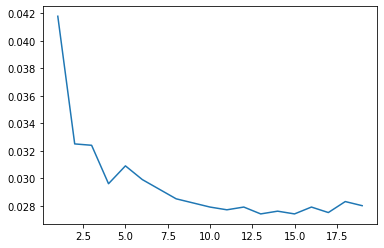

In [60]:
print(f'K_opt = {K_opt}')
plt.plot(K_array, errors)

In [61]:
# prediction for K_opt
predictions_KNN_opt = []
for i in tqdm(predictors):
    pred = KNN(i, predictors, default_dummy, K=K_opt, normalize=True)
    predictions_KNN_opt.append(pred)
predictions_KNN_opt = np.array(predictions_KNN_opt)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [62]:
ms.confusion_matrix(predictions_KNN_opt, default_dummy, print_=True);

+-------------+-----------------------+-----------------------+
| True status |           No          |          Yes          |
+-------------+-----------------------+-----------------------+
|  Prediciton |                       |                       |
|      No     |        TN = 9620      |        FN = 213       |
|     Yes     |         FP = 47       |        TP = 120       |
|             | specificity = 99.51 % | sensitivity = 36.04 % |
+-------------+-----------------------+-----------------------+


###  GAMs